## Importing Libraries

In [10]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

### Training Image Processing

In [22]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


### Validation Image Processing

In [23]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [7]:
training_set

<_BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [10]:
for x,y in training_set:
    print(x, x.shape)
    print(y, y.shape)
    break

tf.Tensor(
[[[[125.5  165.5   94.5 ]
   [126.75 166.75  95.75]
   [107.   144.    74.  ]
   ...
   [140.75 176.75 131.75]
   [136.5  172.5  124.5 ]
   [135.5  172.5  121.5 ]]

  [[113.25 153.25  82.25]
   [102.25 139.25  69.25]
   [100.   137.    67.  ]
   ...
   [141.   177.   132.  ]
   [133.   169.   121.  ]
   [132.   169.   118.  ]]

  [[ 99.25 136.25  66.25]
   [ 88.75 125.75  55.75]
   [ 79.75 114.75  46.75]
   ...
   [142.5  178.5  134.  ]
   [141.   177.   129.5 ]
   [140.75 176.75 128.75]]

  ...

  [[ 41.    77.    31.  ]
   [ 43.25  79.75  30.25]
   [ 58.    95.    42.25]
   ...
   [121.25 146.25 116.25]
   [147.75 170.75 142.75]
   [149.25 172.25 144.25]]

  [[ 51.    87.    41.  ]
   [ 40.5   77.    27.5 ]
   [ 48.5   85.5   33.  ]
   ...
   [150.25 175.25 145.25]
   [136.   159.   131.  ]
   [141.5  164.5  136.5 ]]

  [[ 55.75  91.75  45.75]
   [ 49.5   86.    36.5 ]
   [ 51.25  88.25  35.75]
   ...
   [147.75 172.75 142.75]
   [157.25 180.25 152.25]
   [166.25 189.25 16

### To avoid Overshooting
1. Choose small learning rate default 0.001 we are taking 0.0001
2. There may be chance of Underfitting, so increase number of neuron
3. Add more Convolution layer to extract more feature from images there may be possibility that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

## Building Model

In [5]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model

In [47]:
model = Sequential()

In [48]:
## Building Convolution Layer

In [ ]:
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = [128, 128, 3]))
model.add(Conv2D(filters = 32, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = 2, strides = 2))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = 2, strides = 2))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = 2, strides = 2))
model.add(Conv2D(filters = 256, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 256, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = 2, strides = 2))
model.add(Conv2D(filters = 512, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 512, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = 2, strides = 2))

In [54]:
model.add(Dropout(0.25)) # To avoid overfitting

In [55]:
model.add(Flatten())

In [56]:
model.add(Dense(units = 1500, activation = 'relu'))

In [57]:
model.add(Dropout(0.4))

In [58]:
# Output Layer
model.add(Dense(units = 38, activation = 'softmax'))

### Compiling Model

In [59]:
model.compile(optimizer = tf.keras.optimizers.Adam(
    learning_rate = 0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [60]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 conv2d_25 (Conv2D)          (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 63, 63, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 63, 63, 64)        18496     
                                                                 
 conv2d_27 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 30, 30, 64)        0         
 ng2D)                                                

### Model Training

In [61]:
training_history = model.fit(x = training_set, validation_data = validation_set, epochs = 10)

Epoch 1/10
2197/2197 [==============================] - 3376s 2s/step - loss: 1.3759 - accuracy: 0.5987 - val_loss: 0.5473 - val_accuracy: 0.8313
Epoch 2/10
2197/2197 [==============================] - 3150s 1s/step - loss: 0.4472 - accuracy: 0.8584 - val_loss: 0.2887 - val_accuracy: 0.9076
Epoch 3/10
2197/2197 [==============================] - 14231s 6s/step - loss: 0.2651 - accuracy: 0.9141 - val_loss: 0.2805 - val_accuracy: 0.9145
Epoch 4/10
2197/2197 [==============================] - 3115s 1s/step - loss: 0.1918 - accuracy: 0.9374 - val_loss: 0.2275 - val_accuracy: 0.9270
Epoch 5/10
2197/2197 [==============================] - 3024s 1s/step - loss: 0.1369 - accuracy: 0.9549 - val_loss: 0.1253 - val_accuracy: 0.9608
Epoch 6/10
2197/2197 [==============================] - 3131s 1s/step - loss: 0.1065 - accuracy: 0.9650 - val_loss: 0.1249 - val_accuracy: 0.9628
Epoch 7/10
2197/2197 [==============================] - 3079s 1s/step - loss: 0.0879 - accuracy: 0.9708 - val_loss: 0.1565 

## Model Evaluation

In [63]:
# Model Evaluation on Training set
train_loss, train_acc = model.evaluate(training_set)

2197/2197 [==============================] - 521s 237ms/step - loss: 0.0445 - accuracy: 0.9854


In [64]:
print(train_loss, train_acc)

0.04445463418960571 0.985404372215271


In [65]:
# Model on Validation set
val_loss, val_acc = model.evaluate(validation_set)

550/550 [==============================] - 166s 301ms/step - loss: 0.1507 - accuracy: 0.9573


In [66]:
print(val_loss, val_acc)

0.15069007873535156 0.9573184847831726


### Saving Model

In [67]:
model.save("trained_model.keras")

In [68]:
training_history.history

{'loss': [1.3758620023727417,
  0.44723397493362427,
  0.26510685682296753,
  0.19179724156856537,
  0.13686338067054749,
  0.1064700186252594,
  0.08792810887098312,
  0.07254743576049805,
  0.06471576541662216,
  0.05651182308793068],
 'accuracy': [0.5987339019775391,
  0.8583682775497437,
  0.9141048192977905,
  0.9374208450317383,
  0.9549328088760376,
  0.9650330543518066,
  0.9708229899406433,
  0.9762287735939026,
  0.9790454506874084,
  0.9813358187675476],
 'val_loss': [0.5473468899726868,
  0.2887130379676819,
  0.28050240874290466,
  0.22747235000133514,
  0.12525878846645355,
  0.12488842010498047,
  0.15649336576461792,
  0.10934142768383026,
  0.1219010204076767,
  0.1506900191307068],
 'val_accuracy': [0.8312656283378601,
  0.9075802564620972,
  0.9145231246948242,
  0.9270430207252502,
  0.9608467817306519,
  0.9627817273139954,
  0.9532210230827332,
  0.9671636819839478,
  0.9638060331344604,
  0.9573184847831726]}

In [69]:
# Recording Histbory in json
import json
with open("training_hist.json", "w") as f:
    json.dump(training_history.history, f)

### Accuracy Visualization

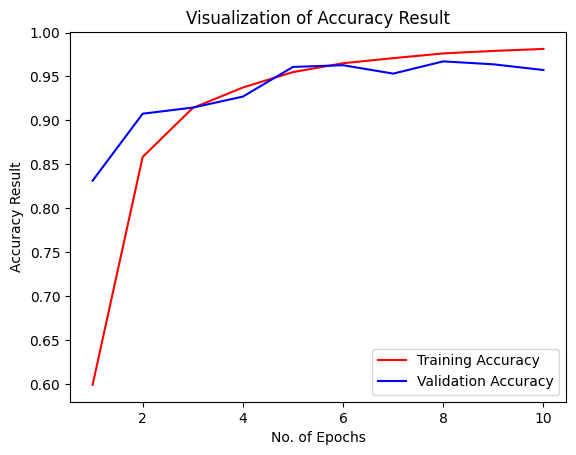

In [76]:
epochs = [i for i in range(1,11)]
plt.plot(epochs, training_history.history['accuracy'], color = 'red', label = 'Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color = 'blue', label = 'Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

### Some other metrics for model evaluation

In [24]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [25]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


#### Load Model

In [1]:
loaded_model = load_model("trained_model.keras")

NameError: name 'load_model' is not defined

In [13]:
y_pred = loaded_model.predict(test_set)

550/550 [==============================] - 118s 213ms/step


In [14]:
y_pred, y_pred.shape
# for 17572 classes it's giving 38 predictions/probabilities we need to select the maximum probability

(array([[9.9999774e-01, 9.2044610e-07, 2.4098687e-10, ..., 6.7714905e-15,
         8.1790450e-15, 2.1169822e-12],
        [9.9456573e-01, 6.4745493e-04, 4.6505249e-07, ..., 1.1646370e-10,
         2.3555499e-10, 6.2990139e-08],
        [1.0000000e+00, 1.1633369e-08, 2.9791536e-10, ..., 7.8311412e-17,
         8.4755980e-16, 5.8674060e-12],
        ...,
        [2.8082671e-12, 4.5741786e-16, 1.8096682e-11, ..., 1.4032406e-13,
         2.1300836e-14, 1.0000000e+00],
        [2.9869524e-11, 4.8299502e-16, 5.7727616e-12, ..., 2.2368190e-13,
         6.9879127e-14, 1.0000000e+00],
        [3.0534363e-11, 5.4199299e-13, 3.1237411e-12, ..., 1.1079726e-13,
         1.2906784e-12, 9.9999940e-01]], dtype=float32),
 (17572, 38))

In [15]:
predicted_categories = tf.argmax(y_pred, axis=1) # finds the maximum probability(argmax) in vertical fashion (axis = 1)
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [16]:
true_categories = tf.concat([y for x,y in test_set], axis = 0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [17]:
Y_true = tf.argmax(true_categories, axis = 1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

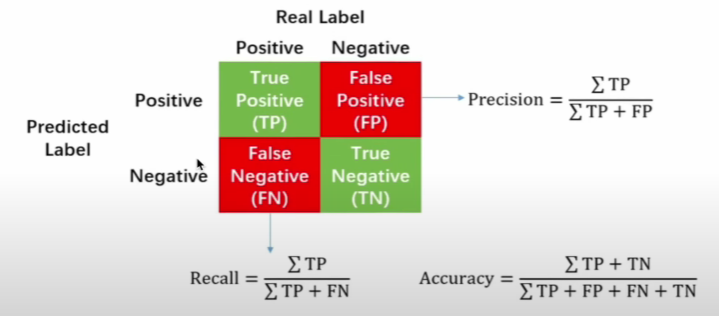

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
print(classification_report(Y_true, predicted_categories, target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.93      0.95       504
                                 Apple___Black_rot       0.93      0.99      0.96       497
                          Apple___Cedar_apple_rust       0.97      0.99      0.98       440
                                   Apple___healthy       0.91      0.97      0.94       502
                               Blueberry___healthy       0.97      0.96      0.96       454
          Cherry_(including_sour)___Powdery_mildew       1.00      0.97      0.98       421
                 Cherry_(including_sour)___healthy       0.95      1.00      0.97       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.91      0.94      0.93       410
                       Corn_(maize)___Common_rust_       0.96      1.00      0.98       477
               Corn_(maize)___Northern_Leaf_Blight       0.95      0.96      0.

In [28]:
cm = confusion_matrix(Y_true, predicted_categories)
cm

array([[471,   4,   0, ...,   0,   0,   0],
       [  0, 493,   0, ...,   0,   0,   0],
       [  0,   0, 434, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 485,   0,   0],
       [  0,   0,   0, ...,   1, 429,   0],
       [  0,   0,   1, ...,   0,   0, 475]], dtype=int64)

### Confusion Matrix Visualization

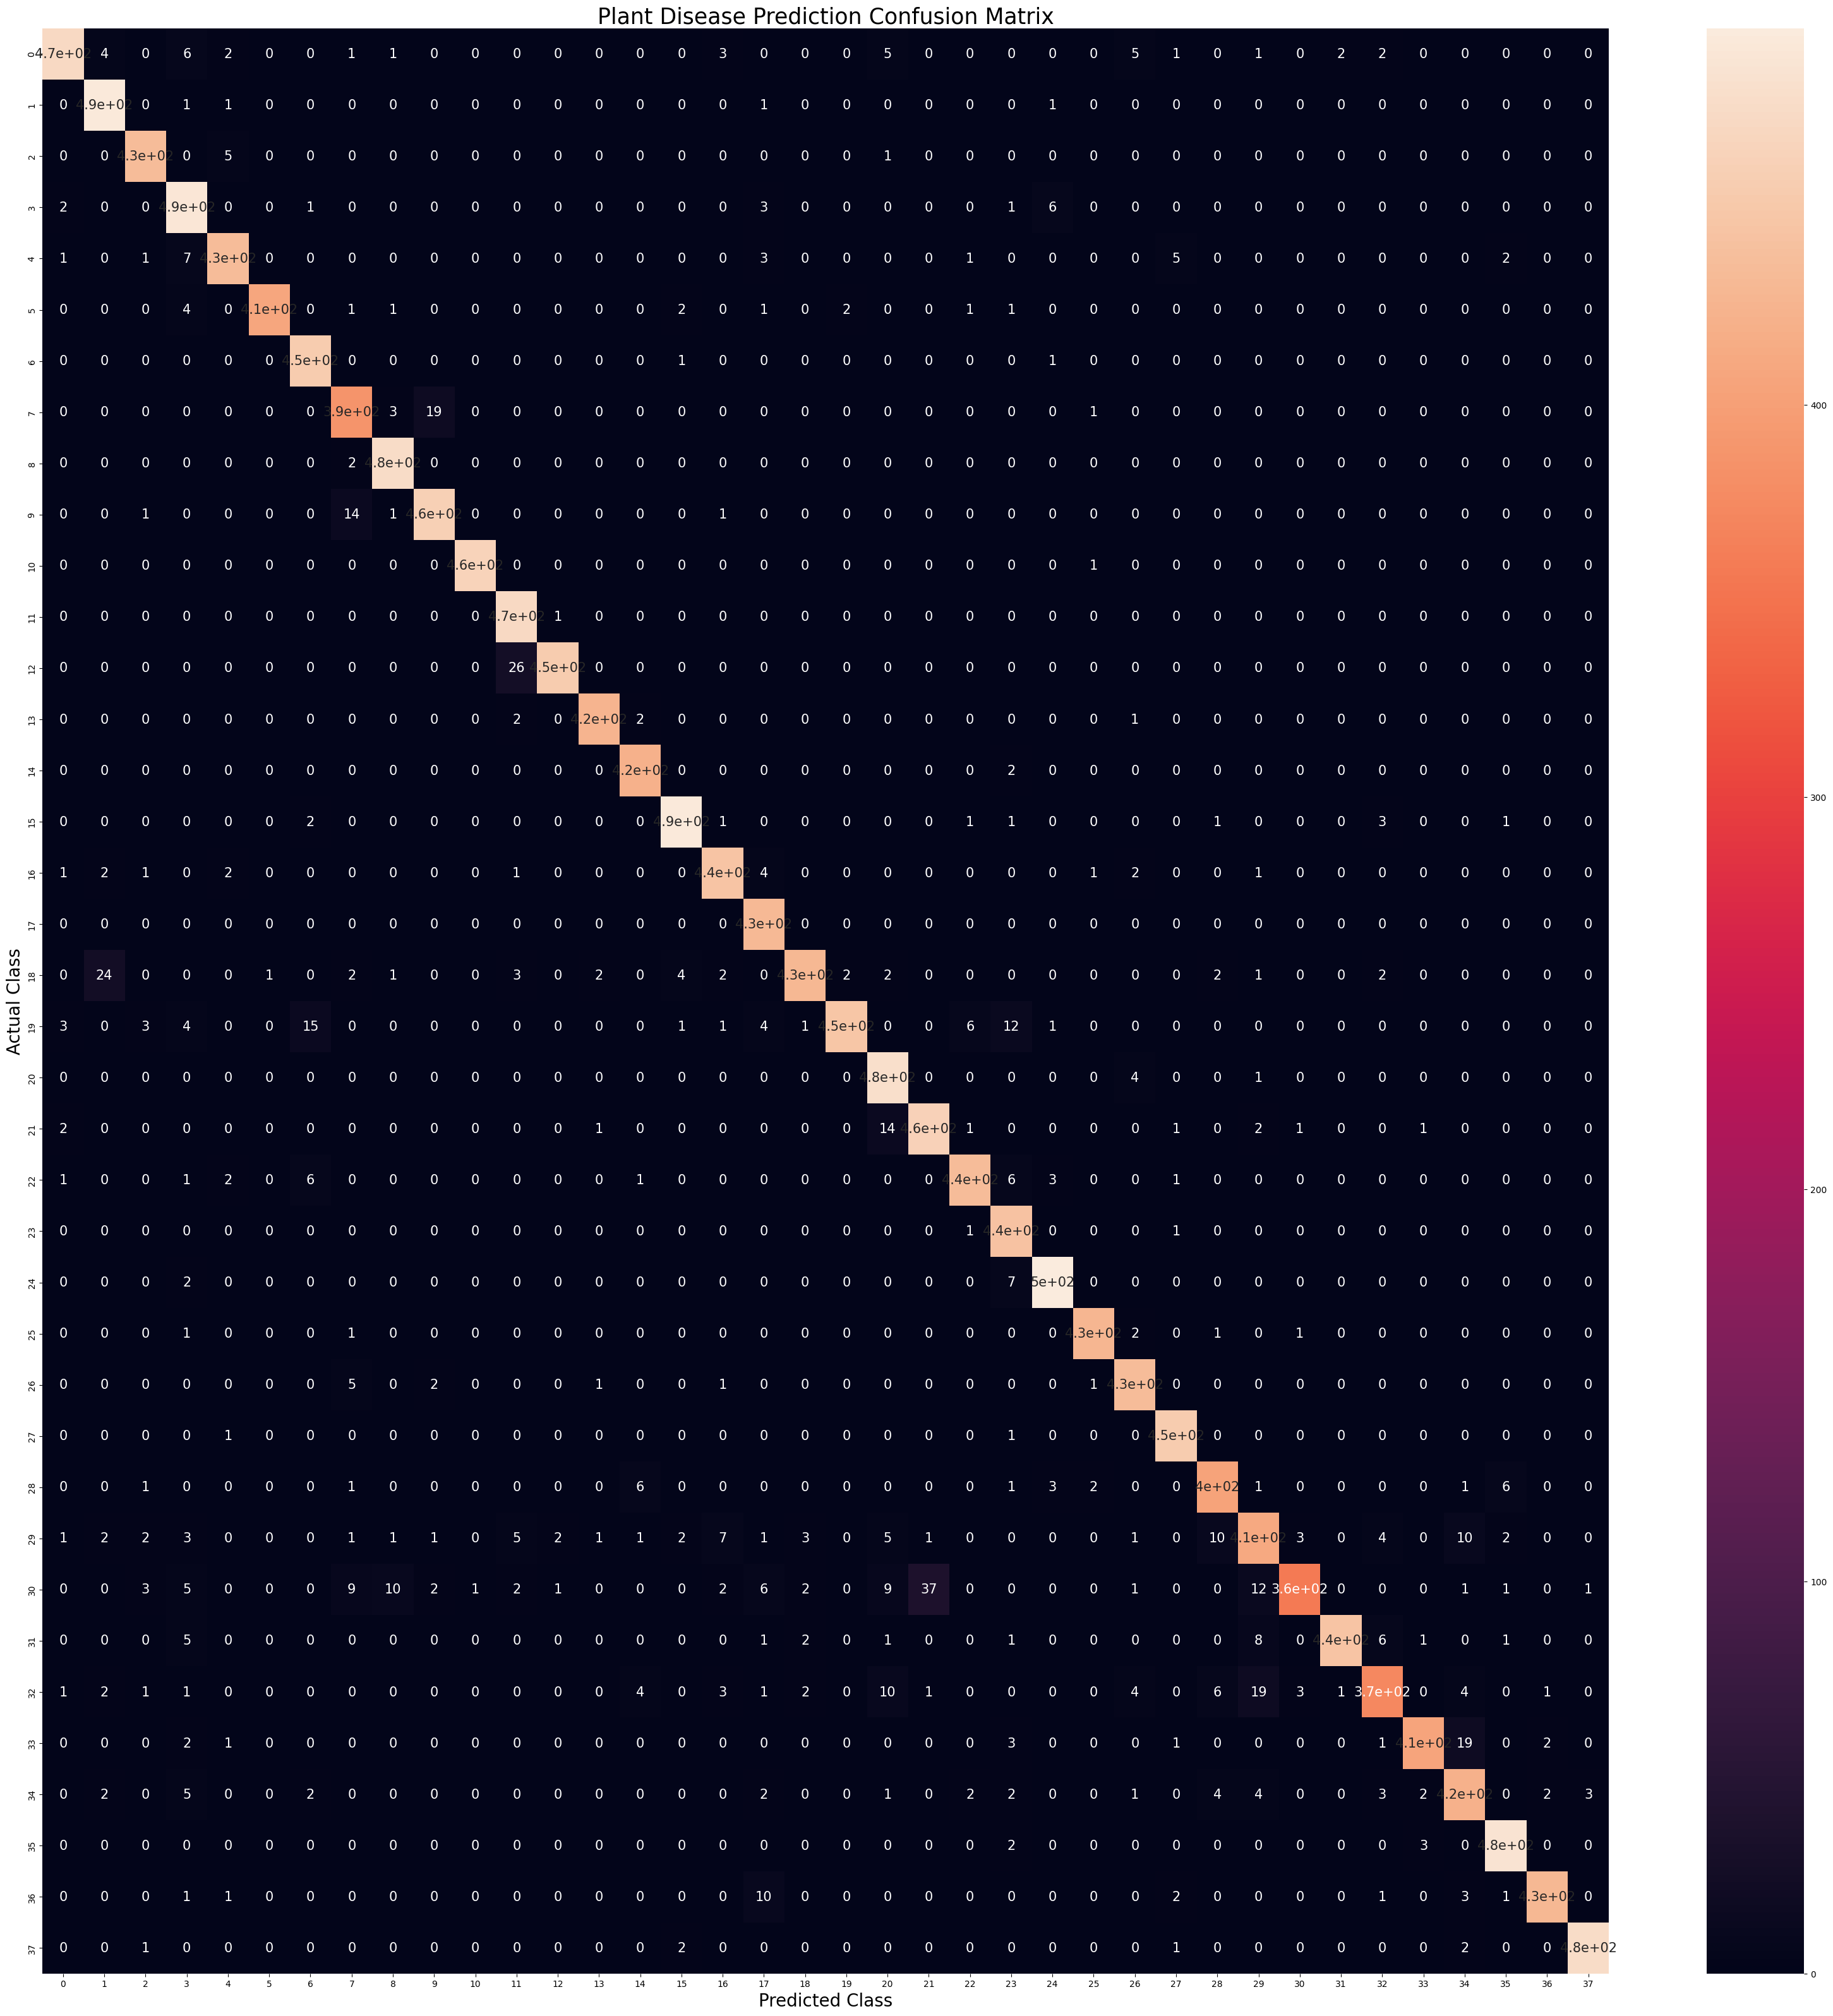

In [39]:
plt.figure(figsize=(40,40))
sns.heatmap(cm, annot=True, annot_kws={'size':15})
plt.xlabel("Predicted Class", fontsize=20)
plt.ylabel("Actual Class", fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix", fontsize=25)
plt.show()

Sure! Here are some long summary points based on the project:

1. Importing Libraries: The project starts with importing necessary libraries such as TensorFlow, Matplotlib, Pandas, and Seaborn. These libraries are essential for data preprocessing, model building, and visualization.

2. Data Preprocessing: The project involves preprocessing the training and validation images. The `image_dataset_from_directory()` function from TensorFlow is used to load the images, assign labels, and perform other preprocessing tasks such as resizing and batching.

3. Building the Model: The model architecture is built using the Sequential API from TensorFlow. It consists of multiple convolutional layers, max pooling layers, dropout layers, and dense layers. The model is designed to extract features from the images and classify them into different categories.

4. Compiling the Model: The model is compiled using the Adam optimizer with a learning rate of 0.0001. The loss function used is categorical cross-entropy, and the metric used for evaluation is accuracy.

5. Model Training: The model is trained using the `fit()` function, with the training set and validation set as inputs. The number of epochs is set to 10. The training history is stored for further analysis.

6. Model Evaluation: The trained model is evaluated on both the training set and the validation set. The evaluation metrics used are loss and accuracy. The results are printed and can be used to assess the performance of the model.

7. Saving the Model: The trained model is saved as a .keras file for future use. The model can be loaded and used for making predictions on new data.

8. Accuracy Visualization: The accuracy of the model on the training set and validation set is visualized using a line plot. The number of epochs is plotted on the x-axis, and the accuracy results are plotted on the y-axis. This visualization helps in understanding the model's performance over the training epochs.

9. Model Evaluation Metrics: Additional evaluation metrics such as precision, recall, and F1-score are calculated using the `classification_report()` function from scikit-learn. These metrics provide a detailed analysis of the model's performance for each class.

10. Confusion Matrix Visualization: The confusion matrix is calculated using the `confusion_matrix()` function from scikit-learn. It provides a visual representation of the model's performance by showing the number of true positives, true negatives, false positives, and false negatives for each class. The confusion matrix is then visualized using a heatmap.

These are the key points summarizing the project workflow.